In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
#Setting working directory
os.chdir("C:/Users/HP/Desktop/Project")

In [4]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\Project'

In [5]:
#Importing train_cab dataset
train = pd.read_csv("train_cab.csv")

In [6]:
# Missing values analysis
missing_val = pd.DataFrame(train.isnull().sum())

In [7]:
missing_val= missing_val.reset_index()

In [8]:
missing_val = missing_val.rename(columns = {"index":"variables", 0:"missing_percentage"})

In [9]:
# Calculating the Percentage and sorting the data
missing_val['missing_percentage']= (missing_val['missing_percentage']/len(train))*100


In [10]:
missing_val= missing_val.sort_values('missing_percentage', ascending= False).reset_index(drop=True)

In [11]:
missing_val

,variables,missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.149374
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [12]:
train_subset = train[['fare_amount','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]

In [15]:
train_subset['fare_amount'].loc[0] =np.nan

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
train_subset['fare_amount'].loc[0]

nan

In [ ]:
#Actual value =4.5
#Mean value  =
#Median value  =
#KNN value  =

In [17]:
# Mean method
train_subset['fare_amount'] = train_subset['fare_amount'].fillna(train_subset['fare_amount'].mean())

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# Median method
train_subset['fare_amount'] = train_subset['fare_amount'].fillna(train_subset['fare_amount'].median())

In [ ]:
#KNN
#Showing error while importing KNN from fancyimpute

{'whiskers': [<matplotlib.lines.Line2D at 0x5c02f56b70>,
 'caps': [<matplotlib.lines.Line2D at 0x5c02f56f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x5c02f567b8>],
 'medians': [<matplotlib.lines.Line2D at 0x5c02f5e8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x5c02f5ec18>],
 'means': []}

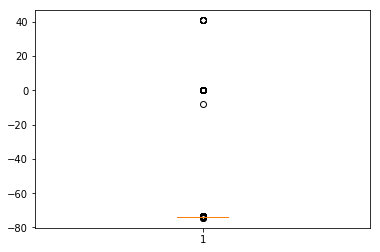

In [19]:
# Outlier Analysis Using Box plot method
plt.boxplot(train_subset['dropoff_longitude'])

In [20]:
#Feature Selection
#Saving continous variables in cnames
cnames = ['fare_amount','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [21]:
df_corr = train_subset.loc[:,cnames]

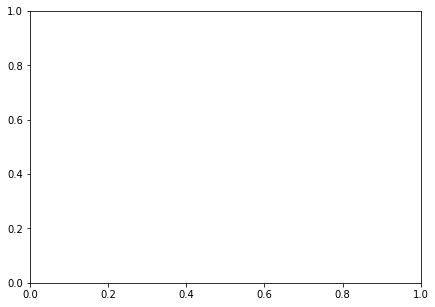

In [23]:
f,ax = plt.subplots(figsize=(7,5))

In [24]:
corr = df_corr.corr()

In [25]:
import seaborn as sns
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True), square=True,ax=ax)

(array([1., 0., 0., ..., 1., 0., 2.]),
 array([-74.438233  , -74.43622637, -74.43421975, ...,  40.76211175,
         40.76411837,  40.766125  ]),
 <a list of 57412 Patch objects>)

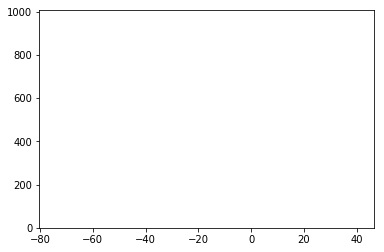

In [31]:
#Feature Scaling
plt.hist(train_subset['pickup_longitude'], bins ='auto')

In [29]:
for i in cnames:
    print(i)
    train_subset[i] = (train_subset[i] - min(train_subset[i]))/(max(train_subset[i])- min(train_subset[i]))

fare_amount


TypeError: '<' not supported between instances of 'str' and 'float'

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#Dividing train_subset dataset into tr and test
tr, test = train_test_split(train_subset , test_size =0.2)

In [37]:
# Linear Regression Model
import statsmodels.api as sm

In [38]:
tr

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
8183,6.1,2009-06-10 17:36:00 UTC,-73.974352,40.762957,-73.959982,40.779230
13197,4.5,2010-01-24 13:58:36 UTC,-73.976734,40.758849,-73.985880,40.756307
5855,12.5,2013-07-21 02:18:14 UTC,-73.987713,40.732545,-73.952935,40.780368
7441,5.7,2011-05-09 13:09:00 UTC,-73.994545,40.751093,-73.982402,40.762032
3009,12.9,2010-06-30 14:17:07 UTC,-73.954154,40.764129,-73.993356,40.751290
7914,14.1,2011-09-13 18:55:00 UTC,-73.981125,40.733452,-73.978157,40.773175
15853,6.5,2010-06-03 07:42:53 UTC,-73.985218,40.735863,-73.976145,40.755775
380,6,2013-12-30 15:16:17 UTC,-73.974200,40.762693,-73.979824,40.755547
12627,5.3,2010-12-12 17:09:00 UTC,-73.981522,40.743945,-73.988570,40.731390
7626,8.5,2014-06-18 18:19:00 UTC,-73.987802,40.754990,-73.978677,40.752175


In [39]:
model = sm.OLS(tr.iloc[:,0], tr.iloc[:,1:6]).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [45]:
#Predict the test cases
pre = model.predict(test.iloc[:,1:6])

NameError: name 'model' is not defined

In [41]:
#Calculate MAPE
def MAPE(y_true, y_pre):
    mape = np.mean(np.abs((y_true - y_pre)/y_true))
    return mape

In [ ]:
MAPE(test.iloc[:,0], pre)

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [44]:
model_dt = DecisionTreeRegressor(max_depth = 2).fit(tr.iloc[:,1:6], tr.iloc[:,0])

ValueError: could not convert string to float: '2009-06-10 17:36:00 UTC'

In [ ]:
# Predict Test Cases
pre_dt = model_dt.predict(test.iloc[:,1:6])

In [ ]:
#Calculate MAPE
MAPE(test.iloc[:,0], pre_dt)